In [56]:
# Written by Nicole Pham
import requests           
from io import StringIO

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

import warnings
warnings.filterwarnings('ignore')

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed) 

In [57]:
# Written by Nicole Pham
# Feature - Name List
features = 'age workclass fnlwgt education education-num marital-status occupation relationship race sex capital-gain capital-loss hours-per-week native-country'
features = features.split(' ')

In [58]:
# Written by Nicole Pham
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

with requests.get(url) as link:
    datafile = StringIO(link.text)
    
    adults_X = []
    adults_y = []
    for line in datafile:
        split_line = line[:-1].split(', ')
        if len(split_line) == 15:
            adults_X.append([x if x != '?' else np.nan for x in split_line[:-1]])
            adults_y.append([split_line[-1]])

    # Since not all of the inputs are numbers (there is categorical data), we need to use
    # an ordinal encoder which will translate these into integers
    ord_enc = OrdinalEncoder()
    # we are going to use the encoded_missing_value parameter to encode missing values as well,
    # this sets any missing values (?) to -1
    adults_X = ord_enc.set_params(encoded_missing_value=-1).fit_transform(adults_X)
    
    label_enc = LabelEncoder()
    adults_y = label_enc.fit_transform(adults_y)

In [59]:
# Written by Nicole Pham
adults_X = np.asarray(adults_X)
adults_y = np.asarray(adults_y)

print(adults_X.shape)
print(adults_y.shape)

(32561, 14)
(32561,)


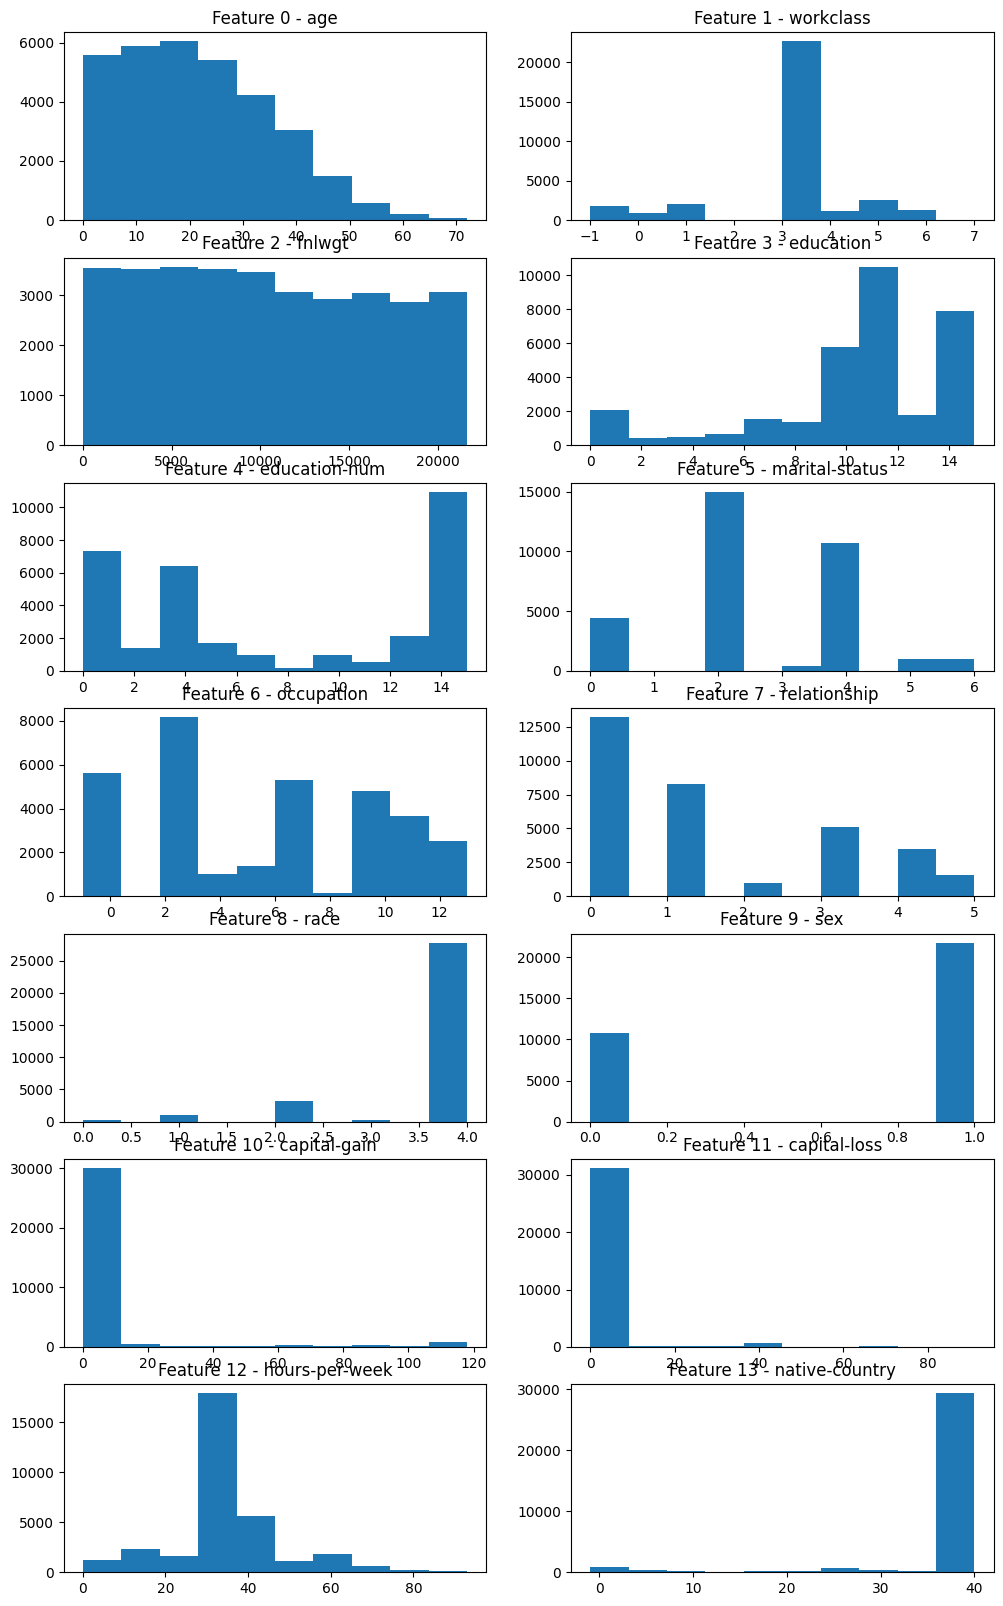

In [60]:
# Written by Nicole Pham
# Create a figure with 7 rows and 2 column
fig, axes = plt.subplots(7, 2, figsize=(12, 20))

for i in range(7):
    for j in range(2):
        adult_feature = adults_X[:,(i * 2) + j]
        axes[i][j].hist(adult_feature)
        axes[i][j].set_title(f'Feature {(i * 2) + j} - {features[(i * 2) + j]}')

In [63]:
# Written by Nicole Pham
# Since we're dealing with a large dataset here, we decided to use a neural network in order to
# have some flexibility with our model.

adults_X_tr, adults_X_te, adults_y_tr, adults_y_te = train_test_split(adults_X, adults_y, test_size=0.1, random_state=seed, shuffle=True)

learner_1 = MLPClassifier(
            hidden_layer_sizes = (64), activation = 'relu',
            solver = 'sgd', learning_rate = 'constant',
            learning_rate_init = 0.05, batch_size = 256, 
            max_iter = 100, n_iter_no_change = 100,
            random_state = seed)
learner_2 = MLPClassifier(
            hidden_layer_sizes = (128), activation = 'relu',
            solver = 'sgd', learning_rate = 'constant',
            learning_rate_init = 0.001, batch_size = 256, 
            max_iter = 100, n_iter_no_change = 100,
            random_state = seed)
learner_3 = MLPClassifier(
            hidden_layer_sizes=(64), activation='relu',
            solver = 'sgd', learning_rate = 'constant', 
            learning_rate_init = 0.001, batch_size = 256,
            random_state = seed)

train_sizes = [100, 1000, 5000, 10000, 20000, 30000]
neural_tr_errors1 = []
neural_te_errors1 = []

neural_tr_errors2 = []
neural_te_errors2 = []

neural_tr_errors3 = []
neural_te_errors3 = []

for size in train_sizes:
    new_adults_X_tr = adults_X_tr[:size, :]
    new_adults_y_tr = adults_y_tr[:size]
    
    learner_1.fit(new_adults_X_tr, new_adults_y_tr)
    learner_2.fit(new_adults_X_tr, new_adults_y_tr)
    learner_3.fit(new_adults_X_tr, new_adults_y_tr)
    
    # Compute the training and test error rates for first learner
    YtHat = learner_1.predict(new_adults_X_tr)
    YeHat = learner_1.predict(adults_X_te)
    neural_tr_errors1.append(zero_one_loss(YtHat, new_adults_y_tr))
    neural_te_errors1.append(zero_one_loss(YeHat, adults_y_te))
    
    # Compute the training and test error rates for second learner
    YtHat = learner_2.predict(new_adults_X_tr)
    YeHat = learner_2.predict(adults_X_te)
    neural_tr_errors2.append(zero_one_loss(YtHat, new_adults_y_tr))
    neural_te_errors2.append(zero_one_loss(YeHat, adults_y_te))
    
    YtHat = learner_3.predict(new_adults_X_tr)
    YeHat = learner_3.predict(adults_X_te)
    neural_tr_errors3.append(zero_one_loss(YtHat, new_adults_y_tr))
    neural_te_errors3.append(zero_one_loss(YeHat, adults_y_te))

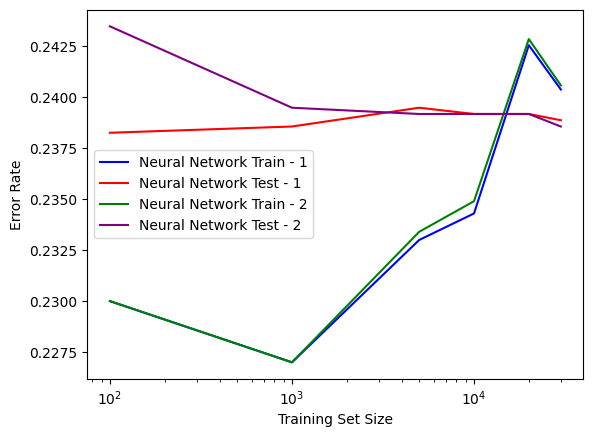

In [65]:
# Written by Nicole Pham

plt.semilogx(train_sizes, neural_tr_errors1, color='blue', label='Neural Network Train - 1')
plt.semilogx(train_sizes, neural_te_errors1, color='red', label='Neural Network Test - 1')

plt.semilogx(train_sizes, neural_tr_errors2, color='green', label='Neural Network Train - 2')
plt.semilogx(train_sizes, neural_te_errors2, color='purple', label='Neural Network Test - 2')

plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.legend(fontsize = 10, loc = 0)

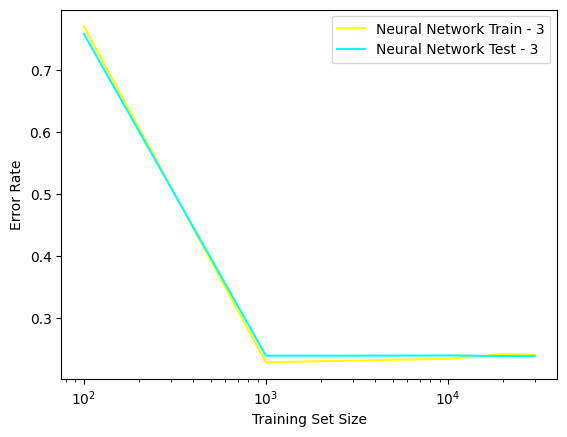

In [66]:
# Written by Nicole Pham
plt.semilogx(train_sizes, neural_tr_errors3, color='yellow', label='Neural Network Train - 3')
plt.semilogx(train_sizes, neural_te_errors3, color='cyan', label='Neural Network Test - 3')

plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.legend(fontsize = 10, loc = 0)